In [2]:
import xarray as xr
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from xgcm import Grid
import os
import zarr 
import dask
import regionmask


In [3]:
a=[None]*10
for b in range(10):
    first_time=50901+b*100
    second_time=50912+b*100
    a[b] = '/vortex1/jupyter-isaiah605963/data/iHESP/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.KE.'+'0%s-0%s'%(first_time,second_time)+'.nc'

    

In [4]:
data1 = xr.open_mfdataset(a)

In [5]:
data1

<xarray.Dataset>
Dimensions:             (z_t: 62, z_t_150m: 15, z_w: 62, z_w_top: 62,
                         z_w_bot: 62, time: 120, nlat: 2400, nlon: 3600, d2: 2)
Coordinates:
  * z_t                 (z_t) float32 500.0 1.5e+03 ... 5.625e+05 5.875e+05
  * z_t_150m            (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                 (z_w) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_top             (z_w_top) float32 0.0 1e+03 2e+03 ... 5.5e+05 5.75e+05
  * z_w_bot             (z_w_bot) float32 1e+03 2e+03 3e+03 ... 5.75e+05 6e+05
    ULONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG               (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT                (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
  * time                (time) object 0509-02-01 00:00:00 ... 0519-01-01 00:0...
Dimensions without coordinates: nlat, nlon, d2
Data variables: (12/51)
    dz                  (time, z_t) float32 dask.array<chunksize=(12, 62), meta=np.ndarray>
    dzw                 (time, z_w) float32 dask.array<chunksize=(12, 62), meta=np.ndarray>
    KMT                 (time, nlat, nlon) float64 dask.array<chunksize=(12, 2400, 3600), meta=np.ndarray>
    KMU                 (time, nlat, nlon) float64 dask.array<chunksize=(12, 2400, 3600), meta=np.ndarray>
    REGION_MASK         (time, nlat, nlon) float64 dask.array<chunksize=(12, 2400, 3600), meta=np.ndarray>
    UAREA               (time, nlat, nlon) float64 dask.array<chunksize=(12, 2400, 3600), meta=np.ndarray>
    ...                  ...
    salinity_factor     (time) float64 -0.00347 -0.00347 ... -0.00347 -0.00347
    sflux_factor        (time) float64 0.1 0.1 0.1 0.1 0.1 ... 0.1 0.1 0.1 0.1
    nsurface_t          (time) float64 5.413e+06 5.413e+06 ... 5.413e+06
    nsurface_u          (time) float64 5.372e+06 5.372e+06 ... 5.372e+06
    time_bound          (time, d2) object dask.array<chunksize=(12, 2), meta=np.ndarray>
    KE                  (time, z_t, nlat, nlon) float32 dask.array<chunksize=(12, 62, 2400, 3600), meta=np.ndarray>
Attributes:
    title:         B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    history:       Sat Jul 24 07:21:32 2021: ncap2 -A -s time=udunits(time, "...
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-05-19 at 18:28:45.2
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  111166211
    tavg_sum:      2678400.0
    NCO:           netCDF Operators version 4.8.1 (Homepage = http://nco.sf.n...

In [6]:

w = data1.isel(z_t=0).KE.where((data1.ULAT>3) & (data1.ULAT<20)).where((data1.ULONG>-75) & (data1.ULONG<-40)).dropna('nlon',how='all').dropna('nlat',how='all')
ww= w*(1025/10000)
warea = (data1.isel(z_t=0).KE.where((data1.ULAT>3) & (data1.ULAT<20)).where((data1.ULONG>-75) & (data1.ULONG<-40)).dropna('nlon',how='all').dropna('nlat',how='all'))*(data1.isel(z_t=0).UAREA.where((data1.ULAT>3) & (data1.ULAT<20)).where((data1.ULONG>-75) & (data1.ULONG<-40)).dropna('nlon',how='all').dropna('nlat',how='all'))
wareaf = warea*(1025/10**8)


In [11]:
ww

<xarray.DataArray 'KE' (time: 120, nlat: 174, nlon: 349)>
dask.array<mul, shape=(120, 174, 349), dtype=float32, chunksize=(12, 174, 349), chunktype=numpy.ndarray>
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(174, 349), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(174, 349), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(174, 349), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(174, 349), meta=np.ndarray>
  * time     (time) object 0509-02-01 00:00:00 ... 0519-01-01 00:00:00
Dimensions without coordinates: nlat, nlon

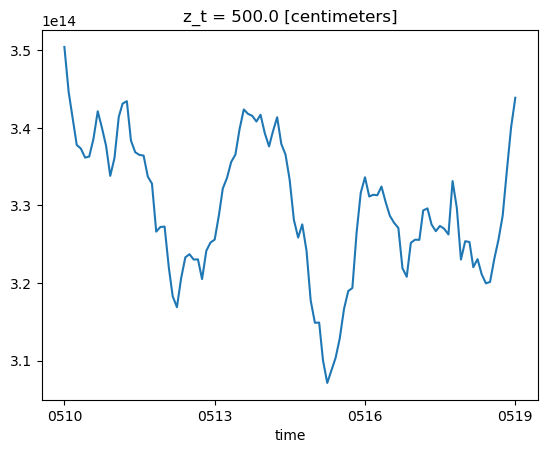

In [8]:
wareaf.sum(['nlon', 'nlat']).rolling(time=12).mean().plot()

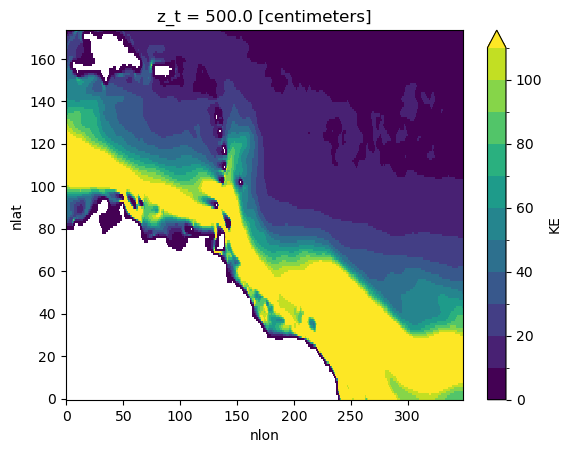

In [60]:
ww.mean('time').plot(levels=np.arange(0,120,10))

In [27]:
data1.isel(z_t=0).KE.mean('time')

<xarray.DataArray 'KE' (nlat: 2400, nlon: 3600)>
dask.array<mean_agg-aggregate, shape=(2400, 3600), dtype=float32, chunksize=(2400, 3600), chunktype=numpy.ndarray>
Coordinates:
    z_t      float32 500.0
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(2400, 3600), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon

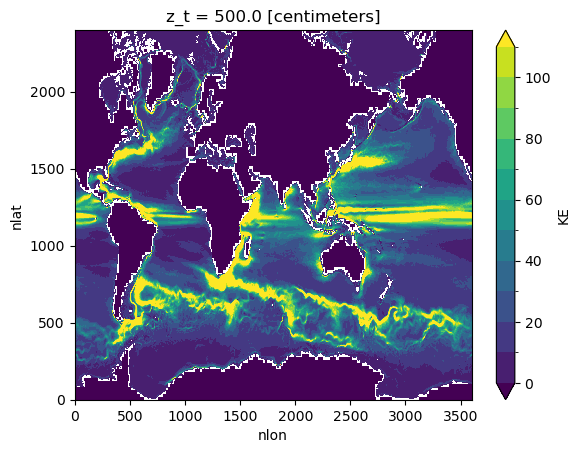

In [10]:
(data1.isel(z_t=0).KE*1025/10000).mean('time').plot(levels=np.arange(0,120,10),cmap='viridis')

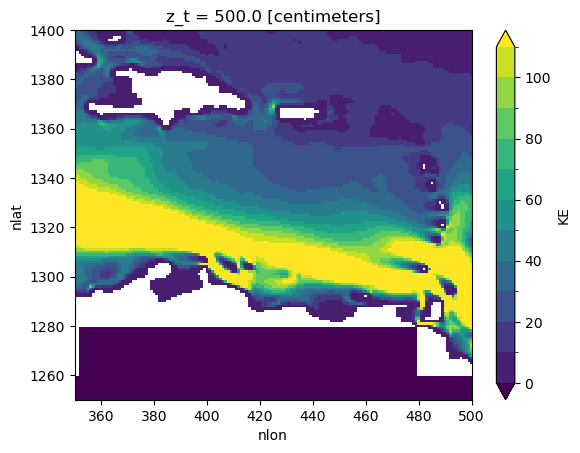

In [4]:
(data1.isel(z_t=0).KE*1025/10000).mean('time').plot(xlim=(350,500),ylim=(1250,1400),levels=np.arange(0,120,10),cmap='viridis')